In [42]:
####  code use for segregating the time into same format as of updated cataloge file

In [43]:
import pandas as pd

# Load CSV file
file_path = 'query (2).csv'
df = pd.read_csv(file_path)

# Define mapping groups
mb_types = {'mb', 'MB', 'mblg', 'mbr', 'Mb'}
mw_types = {'Mw', 'MW', 'mwc', 'mww', 'mwr'}

# Normalize magType (case-insensitive matching)
df['magType'] = df['magType'].str.lower()

# Identify rows that are mb-type
mb_mask = df['magType'].isin([x.lower() for x in mb_types])

# Print range of original mb magnitudes
mb_range = df.loc[mb_mask, 'mag']
if not mb_range.empty:
    print(f"Original mb magnitude range: min = {mb_range.min()}, max = {mb_range.max()}")
else:
    print("No mb-type magnitudes found.")

# Apply conversion to MW using the formula
df.loc[mb_mask, 'mag'] = 0.85 * df.loc[mb_mask, 'mag'] + 1.03

# Set all magType to 'Mw' after conversion
df['magType'] = 'Mw'

# Save updated CSV
df.to_csv(file_path, index=False)
print(f"\nUpdated magnitudes saved back to: {file_path}")


KeyError: 'magType'

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('query (2).csv')

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract Year, Month, and Day into separate columns
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month
df['date'] = df['time'].dt.day

# Optional: Move new columns to the front if you prefer
df = df[['Year', 'Month', 'date', 'time', 'Long.', 'Lat.', 'Mw']]

# Save to a new CSV (or overwrite the original if you prefer)
df.to_csv('query_with_separated_time.csv', index=False)

print("Updated CSV with Year, Month, and date columns saved as 'query_with_separated_time.csv'.")


In [ ]:
#### code use for combining both the file 

In [ ]:
import pandas as pd

# Load the CSV file
csv_file = 'query_with_separated_time.csv'
df_csv = pd.read_csv(csv_file)

# Load the Excel file
excel_file = 'Updated_catalog_2023.xlsx'
df_excel = pd.read_excel(excel_file)

# Make sure the column names are consistent between the two
# Fill missing columns in CSV with NaN (if any)
for col in df_excel.columns:
    if col not in df_csv.columns:
        df_csv[col] = pd.NA

# Reorder CSV columns to match Excel file
df_csv = df_csv[df_excel.columns]

# Concatenate the two DataFrames
df_combined = pd.concat([df_excel, df_csv], ignore_index=True)

# Save the final DataFrame to a new Excel file
output_file = 'Updated_catalog_2023_Final_.xlsx'
df_combined.to_excel(output_file, index=False)

print(f"✅ Combined file saved as: {output_file}")


In [ ]:
### map of earthquake events
data = pd.read_excel('Updated_catalog_2023_Final_.xlsx', sheet_name='Sheet1')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read the Excel file (assuming the sheet name is 'Sheet1')


# Extract the relevant columns: 'Long.', 'Lat.', and 'Mw'
longitudes = data['Long.'].values  # Longitude
latitudes = data['Lat.'].values    # Latitude
magnitudes = data['Mw'].values     # Magnitude (Mw)

# Define the grid boundaries and intervals
lat_min, lat_max = 33, 40 
lon_min, lon_max = 69, 74.05  
lat_grid = np.arange(lat_min, lat_max + 0.2, 0.2)
lon_grid = np.arange(lon_min, lon_max + 0.2, 0.2)

# Create the plot with Cartopy for a map-like view
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection for lat/lon

# Add geographical features for better context
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # Land
ax.add_feature(cfeature.OCEAN)  # Ocean
ax.add_feature(cfeature.COASTLINE)  # Coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Country borders
ax.add_feature(cfeature.LAKES, alpha=0.5)  # Lakes
ax.add_feature(cfeature.RIVERS)  # Rivers

# Add grid lines
ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Scatter plot with magnitude scaling
circle_size_factor = 10  # Reduced size for better clarity
sc = ax.scatter(longitudes, latitudes, c=magnitudes, cmap='viridis', 
                s=magnitudes * circle_size_factor, edgecolor='k', alpha=0.8, 
                transform=ccrs.PlateCarree(), label='Magnitude')

# Add colorbar for magnitudes
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02, shrink=0.8)
cbar.set_label('Magnitude (Mw)')

# Set plot limits
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Siesmicity in the Hindu Kush Region' , fontsize=14)

# Show the plot
plt.show()

In [ ]:
#### Year of completeness code 

In [ ]:
# Reference curves
# Plotting
plt.figure(figsize=(8, 8))
for i in range(4):  # only first 4 bins
    plt.loglog(T, sigma[i], marker=markers[i], linestyle='none',
               markerfacecolor='gray', color=colors[i], label=M_labels[i])

T_ext = [0.1] + T + [5000]
ref_lines = {
    "2000/√T": 2000 / np.sqrt(T_ext),
    "300/√T": 300 / np.sqrt(T_ext),
    "15/√T": 15 / np.sqrt(T_ext),
    "1.5/√T": 1.5/ np.sqrt(T_ext)
}

for label, values in ref_lines.items():
    plt.loglog(T_ext, values, '--k')

# Axis settings
plt.xlabel('Time window length (years prior 2018)', fontsize=14, fontweight='bold')
plt.ylabel('Standard deviation of mean occurrence rate (σλ)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([8, 4000])
plt.ylim([0.01, 1000])
plt.gca().set_aspect('equal', adjustable='box')
plt.box(True)
plt.tight_layout()
plt.show()

In [ ]:
### code for Plot of the cumulative frequency against magnitude

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Read the Excel file (assuming the sheet name is 'Sheet1')
data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')

# Extract magnitudes
magnitudes = data['Mw'].values  

# Define magnitude bins (0.1 Mw interval)
bin_width = 0.4
mag_bins = np.arange(min(magnitudes), max(magnitudes) + bin_width, bin_width)

# Compute cumulative frequency for binned data
cumulative_frequency = np.array([np.sum(magnitudes >= mag) for mag in mag_bins])

# Apply Gaussian smoothing
smoothed_cumulative_frequency = gaussian_filter1d(cumulative_frequency, sigma=2)

# Plot Cumulative Frequency vs Magnitude
plt.figure(figsize=(8, 6))
plt.plot(mag_bins, smoothed_cumulative_frequency, marker='o', linestyle='-', color='b', label="Smoothed Curve")

# Logarithmic scale for better visualization
plt.yscale('log')

# Labels and title
plt.xlabel('Magnitude (Mw)')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency vs Magnitude of Earthquakes')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show plot
plt.show()


In [ ]:
####sesimic map of the region

In [ ]:
data = pd.read_excel('Updated_catalog_2023_Final_.xlsx', sheet_name='Sheet1')

Latitude range in data: 0.0 - 47.0148
Longitude range in data: 58.457 - 100.0
Max latitude in filtered data: 47.0148
Number of events above 40° latitude: 1817


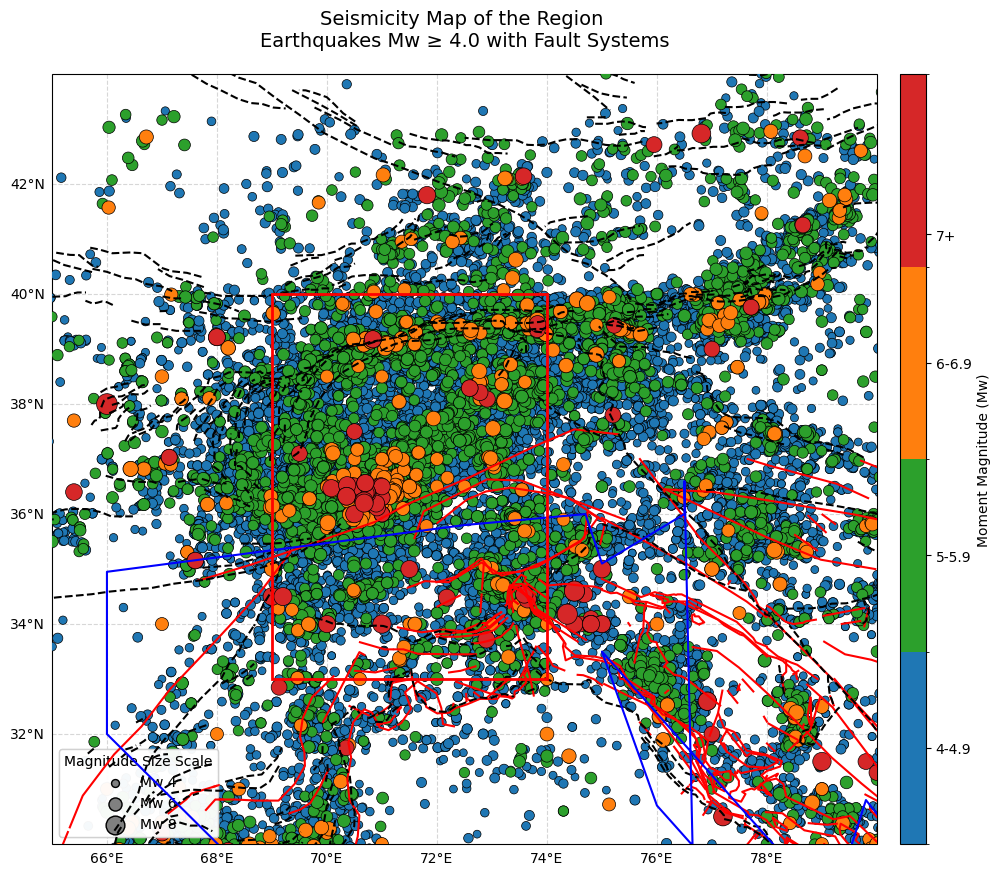

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle
data = pd.read_excel('Updated_catalog_2023_Final_.xlsx', sheet_name='Sheet1')
# Function to load fault line data
def load_fault_lines(file_path):
    fault_lines = []
    with open(file_path, 'r') as f:
        current_fault = []
        for line in f:
            line = line.strip()
            if line == '>':
                if current_fault:
                    fault_lines.append(current_fault)
                    current_fault = []
            else:
                lon, lat = map(float, line.split())
                current_fault.append((lon, lat))
        if current_fault:
            fault_lines.append(current_fault)
    return fault_lines

# Function to load faults with names
def load_faults_with_names(file_path):
    fault_data = []
    with open(file_path, 'r') as f:
        current_fault = []
        for line in f:
            parts = line.strip().split(maxsplit=3)
            lon, lat = float(parts[0]), float(parts[1])
            current_fault.append((lon, lat))
        if current_fault:
            fault_data.append(current_fault)
    return fault_data

# Filter earthquake data
filtered_data = data[data['Mw'] >= 4.0].copy()

# Debugging print
print("Latitude range in data:", filtered_data['Lat.'].min(), "-", filtered_data['Lat.'].max())
print("Longitude range in data:", filtered_data['Long.'].min(), "-", filtered_data['Long.'].max())

# Create magnitude classes
bins = [4, 5, 6, 7, 10]
labels = ['4-4.9', '5-5.9', '6-6.9', '7+']
filtered_data.loc[:, 'Magnitude Class'] = pd.cut(filtered_data['Mw'], bins=bins, labels=labels)

# Sort by magnitude so higher magnitudes plot last (on top)
filtered_data.sort_values('Mw', inplace=True)

# Color scheme
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
cmap = plt.cm.colors.ListedColormap(colors)
norm = plt.cm.colors.BoundaryNorm(bins, cmap.N)

# Set map boundaries
extended_lat_min, extended_lat_max = 30, 44
extended_lon_min, extended_lon_max = 65, 80

# Create figure
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([extended_lon_min, extended_lon_max, extended_lat_min, extended_lat_max])

# Gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# Plot earthquakes first with low zorder
scatter = ax.scatter(filtered_data['Long.'], filtered_data['Lat.'],
                     c=filtered_data['Mw'], cmap=cmap, norm=norm,
                     s=filtered_data['Mw']**2.5,
                     edgecolor='k', linewidth=0.5,
                     transform=ccrs.PlateCarree(), zorder=3)

# Plot fault lines (after scatter) with higher zorder
fault_files = ['fault.txt', 'fault_HT.txt', 'fault_srilanka.txt']

fault_styles = ['-', '--', ':']
fault_colors = ['red', 'black', 'purple']

for file, style, color in zip(fault_files, fault_styles, fault_colors):
    faults = load_fault_lines(file)
    for fault in faults:
        lon, lat = zip(*fault)
        ax.plot(lon, lat, linestyle=style, color=color, linewidth=1.5, transform=ccrs.PlateCarree(), zorder=6)

# Plot named faults
named_faults = load_faults_with_names('faults_name.txt')
for fault in named_faults:
    lon, lat = zip(*fault)
    ax.plot(lon, lat, color='blue', linewidth=1.5, linestyle='-', transform=ccrs.PlateCarree(), zorder=6)

# Highlight study region
study_lat_min, study_lat_max = 33, 40
study_lon_min, study_lon_max = 69, 74
study_box = Rectangle(
    (study_lon_min, study_lat_min),
    study_lon_max - study_lon_min,
    study_lat_max - study_lat_min,
    linewidth=2,
    edgecolor='red',
    facecolor='none',
    transform=ccrs.PlateCarree(),
    zorder=10
)
ax.add_patch(study_box)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label('Moment Magnitude (Mw)')
cbar.set_ticks([4.5, 5.5, 6.5, 7.5])
cbar.set_ticklabels(labels)

# Debug info
print("Max latitude in filtered data:", filtered_data['Lat.'].max())
print("Number of events above 40° latitude:", (filtered_data['Lat.'] > 40).sum())

# Size legend
size_legend = [(4, '4'), (6, '6'), (8, '8')]
legend_elements = [plt.scatter([], [], c='grey', s=s**2.5, edgecolor='k', label=f'Mw {l}') for s, l in size_legend]
legend = ax.legend(handles=legend_elements, title='Magnitude Size Scale', loc='lower left', frameon=True)
ax.add_artist(legend)

# Title and save
plt.title('Seismicity Map of the Region \nEarthquakes Mw ≥ 4.0 with Fault Systems',
          fontsize=14, pad=20)
plt.savefig('Seismicity_Map_WiderRegion.png', dpi=300, bbox_inches='tight')
plt.show()


In [45]:
### 1st Precursor Earthquake earthquake grid count for magnitude of more than or equal to 4

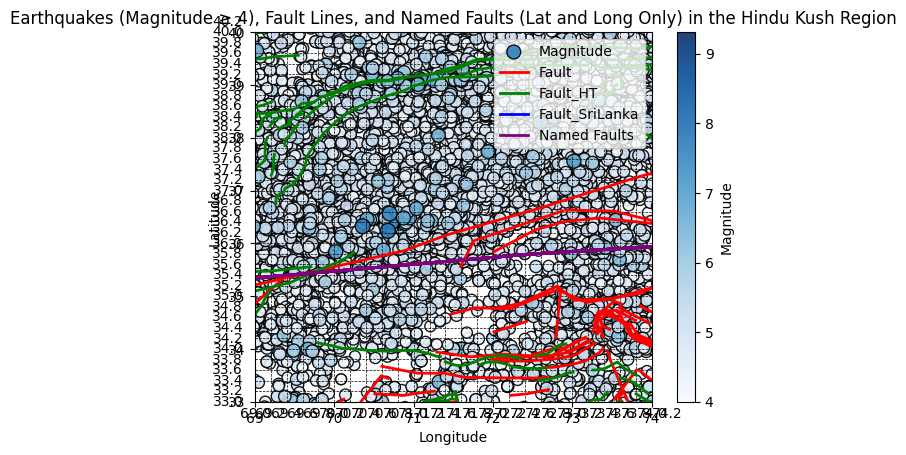

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load fault line data from text files
def load_fault_lines(file_path):
    fault_lines = []
    with open(file_path, 'r') as f:
        current_fault = []
        for line in f:
            line = line.strip()
            if line == '>':
                if current_fault:
                    fault_lines.append(current_fault)
                    current_fault = []
            else:
                lon, lat = map(float, line.split())
                current_fault.append((lon, lat))
        if current_fault:
            fault_lines.append(current_fault)
    return fault_lines

# Function to load the 'faults_name' data (which contains longitude, latitude, and depth, but we're ignoring depth and name)
def load_faults_with_names(file_path):
    fault_data = []
    with open(file_path, 'r') as f:
        current_fault = []
        for line in f:
            lon, lat, _depth, _name = line.strip().split(maxsplit=3)
            current_fault.append((float(lon), float(lat)))
            fault_data.append(current_fault)
    return fault_data

# Load the earthquake data from the Excel file
#data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')

# Filter the data to include only earthquakes with magnitude 4.0 or higher
filtered_data = data[data['Mw'] >= 4.0]

# Extract filtered data for longitudes, latitudes, and magnitudes
longitudes = filtered_data['Long.'].values  # Longitude
latitudes = filtered_data['Lat.'].values    # Latitude
magnitudes = filtered_data['Mw'].values     # Magnitudes (filtered)

# Define the grid boundaries and intervals
lat_min, lat_max = 33, 40  
lon_min, lon_max = 69, 74  
lat_grid = np.arange(lat_min, lat_max + 0.2, 0.2)
lon_grid = np.arange(lon_min, lon_max + 0.2, 0.2)

# Create a 2D array to store earthquake counts for each grid
grid_counts = np.zeros((len(lat_grid) - 1, len(lon_grid) - 1))

# Count the number of earthquakes in each grid
for i in range(len(lat_grid) - 1):
    for j in range(len(lon_grid) - 1):
        # Find the earthquakes within the current latitude and longitude grid
        in_grid = ((latitudes >= lat_grid[i]) & (latitudes < lat_grid[i+1]) &
                   (longitudes >= lon_grid[j]) & (longitudes < lon_grid[j+1]))
        grid_counts[i, j] = np.sum(in_grid)

# Load fault line data from the three fault files
fault_files = ['fault.txt', 'fault_HT.txt', 'fault_srilanka.txt']
fault_labels = ['Fault', 'Fault_HT', 'Fault_SriLanka']
fault_colors = ['red', 'green', 'blue']  # Different colors for each fault file

all_fault_lines = [load_fault_lines(fault_file) for fault_file in fault_files]

# Load faults with names from 'faults_name.txt', but only use longitude and latitude
faults_with_names = load_faults_with_names('faults_name.txt')

# Create a DataFrame to hold the grid counts and labels for latitudes and longitudes
lat_labels = [f'{lat_grid[i]:.1f}-{lat_grid[i+1]:.1f}' for i in range(len(lat_grid) - 1)]
lon_labels = [f'{lon_grid[j]:.1f}-{lon_grid[j+1]:.1f}' for j in range(len(lon_grid) - 1)]

df_grid_counts = pd.DataFrame(grid_counts, index=lat_labels, columns=lon_labels)

# Save the grid count data to an Excel file
df_grid_counts.to_excel('earthquake_grid_counts_magnitude_4_and_above.xlsx')

# Plot the data
#plt.figure(figsize=(20, 14))

# Add horizontal and vertical grid lines and their labels
for lat in lat_grid:
    plt.axhline(y=lat, color='black', linestyle='--', linewidth=0.5)
    plt.text(lon_min - 0.15, lat, f'{lat:.1f}', va='center', ha='right', fontsize=10, color='black')  # Add latitude labels

for lon in lon_grid:
    plt.axvline(x=lon, color='black', linestyle='--', linewidth=0.5)
    plt.text(lon, lat_min - 0.1, f'{lon:.1f}', va='top', ha='center', fontsize=10, color='black')  # Add longitude labels

# Scatter plot with magnitude scaling
circle_size_factor = 15  
sc = plt.scatter(longitudes, latitudes, c=magnitudes, cmap='Blues', 
                 s=magnitudes * circle_size_factor, edgecolor='k', alpha=0.9, label='Magnitude')

# Add colorbar for magnitudes
plt.colorbar(sc, label='Magnitude')

# Plot the fault lines for each file
for fault_lines, label, color in zip(all_fault_lines, fault_labels, fault_colors):
    for fault in fault_lines:
        fault_lon, fault_lat = zip(*fault)  # Unzip into longitude and latitude
        plt.plot(fault_lon, fault_lat, color=color, linewidth=2, label=label)

# Plot the faults from 'faults_name.txt' (latitude and longitude only) using line style as well
for fault in faults_with_names:
    fault_lon, fault_lat = zip(*fault)  # Unzip into longitude and latitude
    plt.plot(fault_lon, fault_lat, color='purple', linewidth=2, label='Named Faults')

# Set plot limits
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquakes (Magnitude ≥ 4), Fault Lines, and Named Faults (Lat and Long Only) in the Hindu Kush Region')

# Avoid repeated labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')  # Specifying fixed legend location

# Show the plot
plt.show()


In [47]:
# Save the grid count data to an Excel file with the specified name and sheet
excel_filename = "Seismic Precursor Calculation _.xlsx"
sheet_name = "Earthquake greater than 4"

# Save to Excel
with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    df_grid_counts.to_excel(writer, sheet_name=sheet_name)

print(f"Data saved successfully to '{excel_filename}' in sheet '{sheet_name}'.")


Data saved successfully to 'Seismic Precursor Calculation _.xlsx' in sheet 'Earthquake greater than 4'.


In [48]:
##### 2. indicator ### Fault density

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic  # For calculating distance between coordinates

# Define grid cell area
grid_cell_area_km2 = 396.7  

# Load earthquake data
#data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')

# Filter earthquakes with Mw >= 4.0
filtered_data = data[data['Mw'] >= 4.0]
# Extract relevant columns
longitudes = filtered_data['Long.'].values  
latitudes = filtered_data['Lat.'].values    
magnitudes = filtered_data['Mw'].values     
years = filtered_data['Year'].values        

# Define the grid boundaries and intervals
lat_min, lat_max = 33, 40  
lon_min, lon_max = 69, 74 
lat_grid = np.arange(lat_min, lat_max + 0.2, 0.2)
lon_grid = np.arange(lon_min, lon_max + 0.2, 0.2)

# Initialize fault density grid
fault_length_grid = np.zeros((len(lat_grid) - 1, len(lon_grid) - 1))

# Assuming `all_fault_lines` is already defined
for fault_lines in all_fault_lines: 
    for fault in fault_lines:
        for i in range(len(fault) - 1):
            point1 = (fault[i][1], fault[i][0])   
            point2 = (fault[i + 1][1], fault[i + 1][0])  
            
            # Midpoint of the segment
            mid_lat = (point1[0] + point2[0]) / 2
            mid_lon = (point1[1] + point2[1]) / 2
            
            # Determine grid cell
            lat_idx = np.searchsorted(lat_grid, mid_lat) - 1
            lon_idx = np.searchsorted(lon_grid, mid_lon) - 1
            
            if 0 <= lat_idx < len(lat_grid) - 1 and 0 <= lon_idx < len(lon_grid) - 1:
                segment_length = geodesic(point1, point2).kilometers
                fault_length_grid[lat_idx, lon_idx] += segment_length

# Calculate fault density
fault_density = fault_length_grid / grid_cell_area_km2
df_fault_density = pd.DataFrame(fault_density, index=lat_grid[:-1], columns=lon_grid[:-1])

# Create a DataFrame for earthquake precursors
df_precursors = pd.DataFrame({
    'Longitude': longitudes,
    'Latitude': latitudes,
    'Magnitude': magnitudes,
    'Year': years
})

# Save both datasets in the same Excel file with different sheets
with pd.ExcelWriter('Seismic Precursor Calculation _.xlsx', mode='a', engine='openpyxl') as writer:
    df_fault_density.to_excel(writer, sheet_name='Fault Density')
    

print("Data saved successfully in 'Seismic Precursor Calculation.xlsx'")


Data saved successfully in 'Seismic Precursor Calculation.xlsx'


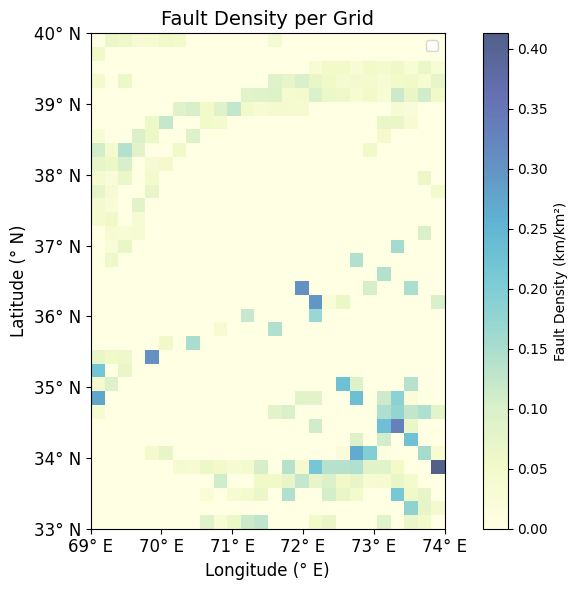

In [50]:
# Plot the fault density
plt.figure(figsize=(8, 6))
plt.imshow(fault_density, extent=[lon_min, lon_max, lat_min, lat_max], origin='lower', cmap='YlGnBu', alpha=0.7)
plt.colorbar(label='Fault Density (km/km²)')
plt.xlabel('Longitude (° E)', fontsize=12)
plt.ylabel('Latitude (° N)', fontsize=12)
plt.title('Fault Density per Grid', fontsize=14)
plt.xticks(ticks=np.arange(lon_min, lon_max + 1, 1), labels=[f'{int(lon)}° E' for lon in np.arange(lon_min, lon_max + 1, 1)], fontsize=12)
plt.yticks(ticks=np.arange(lat_min, lat_max + 1, 1), labels=[f'{int(lat)}° N' for lat in np.arange(lat_min, lat_max + 1, 1)], fontsize=12)
# Avoid repeated labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')  # Specifying fixed legend location
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [51]:
##### 3. indicator ### nearest fault distance

In [52]:
import numpy as np
import pandas as pd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt

# Grid parameters
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74
lat_grid = np.arange(lat_min, lat_max + 0.2, 0.2)
lon_grid = np.arange(lon_min, lon_max + 0.2, 0.2)
grid_lat_centers = (lat_grid[:-1] + lat_grid[1:]) / 2
grid_lon_centers = (lon_grid[:-1] + lon_grid[1:]) / 2

# Create meshgrid of grid centers
lon_centers_mesh, lat_centers_mesh = np.meshgrid(grid_lon_centers, grid_lat_centers)
grid_centers = np.column_stack((lon_centers_mesh.ravel(), lat_centers_mesh.ravel()))

# Load fault line data
def load_fault_lines(file_path):
    fault_lines = []
    with open(file_path, 'r') as f:
        current_fault = []
        for line in f:
            line = line.strip()
            if line == '>':
                if current_fault:
                    fault_lines.append(current_fault)
                    current_fault = []
            else:
                lon, lat = map(float, line.split())
                current_fault.append((lon, lat))
        if current_fault:
            fault_lines.append(current_fault)
    return fault_lines

# Fault file paths
fault_files = ['fault.txt', 'fault_HT.txt', 'fault_srilanka.txt']
all_fault_lines = [load_fault_lines(f) for f in fault_files]
all_fault_lines_flat = [segment for file_faults in all_fault_lines for segment in file_faults]

# Convert all fault segments to shapely LineStrings
fault_geometries = [LineString(segment) for segment in all_fault_lines_flat]

# Compute nearest fault distance for each grid center
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of Earth in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

nearest_fault_distances = []

for lon, lat in grid_centers:
    point = Point(lon, lat)
    min_dist = float('inf')
    for fault in fault_geometries:
        nearest_point = fault.interpolate(fault.project(point))
        dist = haversine(lon, lat, nearest_point.x, nearest_point.y)
        if dist < min_dist:
            min_dist = dist
    nearest_fault_distances.append(min_dist)

# Reshape to 2D grid
nearest_fault_distance_grid = np.array(nearest_fault_distances).reshape(len(grid_lat_centers), len(grid_lon_centers))

# Save to Excel
lat_labels = [f'{lat_grid[i]:.1f}-{lat_grid[i+1]:.1f}' for i in range(len(lat_grid) - 1)]
lon_labels = [f'{lon_grid[j]:.1f}-{lon_grid[j+1]:.1f}' for j in range(len(lon_grid) - 1)]
df_fault_dist = pd.DataFrame(nearest_fault_distance_grid, index=lat_labels, columns=lon_labels)
df_fault_dist.to_excel("nearest_fault_distance_grid.xlsx")

nearest_fault_distance_grid.shape


(36, 26)

In [53]:
# ... [Keep all previous code until the saving section] ...

# Save to existing Excel file with multiple sheets
excel_file = "Seismic Precursor Calculation _.xlsx"



# Save fault distances to the existing workbook
with pd.ExcelWriter(excel_file, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df_fault_dist.to_excel(writer, sheet_name='Fault Distances')

print("Nearest fault distances saved to 'Seismic Precursor Calculation.xlsx' in sheet 'Fault Distances'")

Nearest fault distances saved to 'Seismic Precursor Calculation.xlsx' in sheet 'Fault Distances'


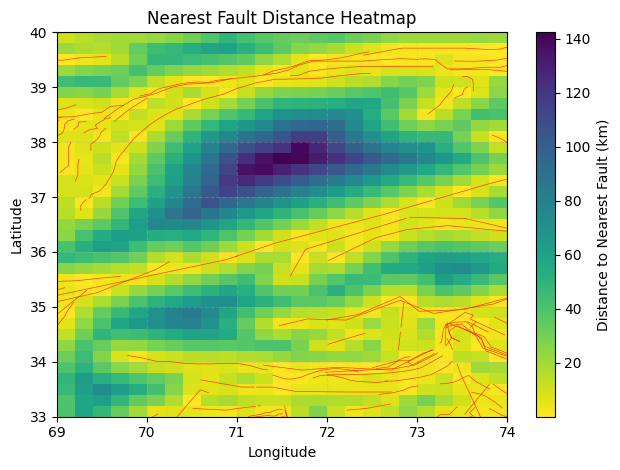

In [54]:

    
# Load distance grid from Excel
df = pd.read_excel("nearest_fault_distance_grid.xlsx", index_col=0)
distance_data = df.values

# Extract latitude and longitude edges from DataFrame labels
def extract_edges(labels):
    edges = []
    first_lower, first_upper = map(float, labels[0].split('-'))
    edges.append(first_lower)
    edges.append(first_upper)
    for label in labels[1:]:
        _, upper = map(float, label.split('-'))
        edges.append(upper)
    return edges

lat_edges = extract_edges(df.index.tolist())
lon_edges = extract_edges(df.columns.tolist())

# Create the plot
#plt.figure(figsize=(12, 8))

# Plot the heatmap
heatmap = plt.pcolormesh(lon_edges, lat_edges, distance_data, 
                         shading='auto', cmap='viridis_r')
plt.colorbar(heatmap, label='Distance to Nearest Fault (km)')

# Overlay fault lines
for fault in fault_geometries:
    x, y = fault.xy
    plt.plot(x, y, color='red', linewidth=0.5, alpha=0.7)

# Set axis limits and labels
plt.xlim(69, 74)  # Original longitude bounds
plt.ylim(33, 40)  # Original latitude bounds
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nearest Fault Distance Heatmap')

# Add grid and styling
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [55]:
###### 4th precursor Strain Rate per grid cell ### check for updated

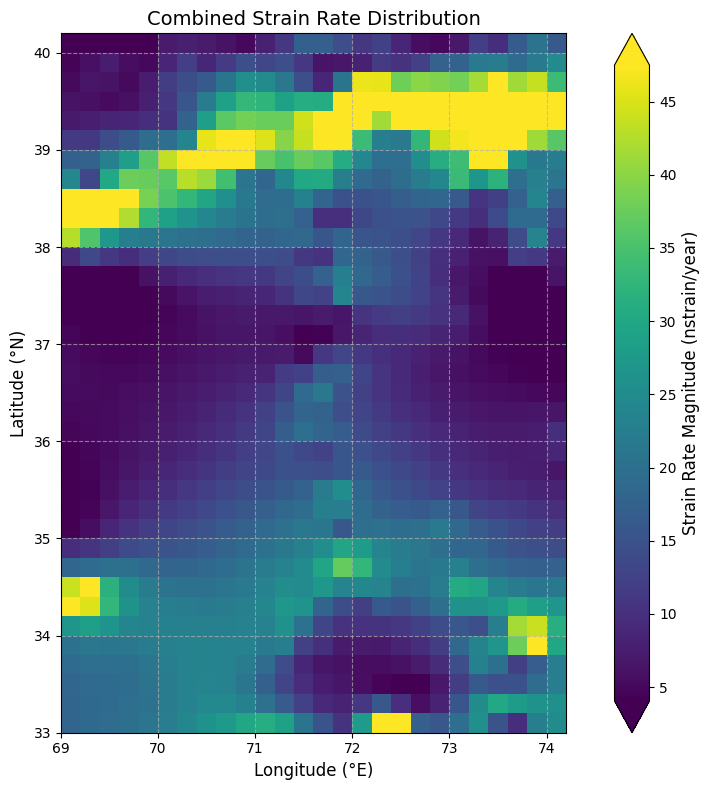

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import os

# --- 1. Parsing the Strain Rate File ---
strain_file = 'GSRM_strain_v2.1-20150901.txt'
strain_data = []

with open(strain_file, 'r') as f:
    for line in f:
        if not line.startswith("#"):
            parts = line.split()
            lat, lon, exx, eyy, exy = map(float, parts[:5])
            strain_data.append([lat, lon, exx, eyy, exy])

strain_df = pd.DataFrame(strain_data, columns=['lat', 'lon', 'exx', 'eyy', 'exy'])

# --- 2. Reading and Processing the CSV File ---
csv_df = pd.read_csv('steven_princi_strain.csv')
csv_df = csv_df.dropna(subset=['emax', 'emin'])
csv_df['strain_rate'] = (csv_df['emax'] + csv_df['emin']) / 2

# --- 3. Calculate Strain Rate for Original Data ---
# CORRECTED: Use proper formula for strain rate magnitude
strain_df['strain_rate'] = np.sqrt(strain_df['exx']**2 + strain_df['eyy']**2 + strain_df['exy']**2)

# --- 4. Combine Data ---
combined_strain = pd.concat([
    strain_df[['lat', 'lon', 'strain_rate']],
    csv_df[['lat', 'lon', 'strain_rate']]
], ignore_index=True)

# --- 5. Define Grid Parameters ---
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74
lat_step, lon_step = 0.2, 0.2

lat_grid = np.arange(lat_min, lat_max + lat_step, lat_step)
lon_grid = np.arange(lon_min, lon_max + lon_step, lon_step)
strain_grid = np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)

# --- 6. Map to Grid Cells ---
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        mask = (
            (combined_strain['lat'] >= lat_grid[i]) &
            (combined_strain['lat'] < lat_grid[i+1]) &
            (combined_strain['lon'] >= lon_grid[j]) &
            (combined_strain['lon'] < lon_grid[j+1])
        )
        if mask.any():
            strain_grid[i, j] = combined_strain.loc[mask, 'strain_rate'].mean()

# --- 7. Save to Excel ---
lat_labels = [f"{lat:.1f}-{lat+lat_step:.1f}" for lat in lat_grid[:-1]]
lon_labels = [f"{lon:.1f}-{lon+lon_step:.1f}" for lon in lon_grid[:-1]]
strain_df_grid = pd.DataFrame(strain_grid, index=lat_labels, columns=lon_labels)

excel_file = 'Seismic Precursor Calculation _.xlsx'  # Removed spaces in filename

# Check if file exists and create new if needed
if not os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
        pd.DataFrame().to_excel(writer, sheet_name='Empty')

# Now append the data
with pd.ExcelWriter(excel_file, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    strain_df_grid.to_excel(writer, sheet_name='Combined Strain Rate Grid')

# --- 8. Plotting ---
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Create meshgrid for plotting
lon_edges, lat_edges = np.meshgrid(lon_grid, lat_grid)
plot = ax.pcolormesh(lon_edges, lat_edges, strain_grid, 
                   cmap='viridis', shading='auto',
                   vmin=np.nanpercentile(strain_grid, 5),
                   vmax=np.nanpercentile(strain_grid, 95))

# Add colorbar
cbar = plt.colorbar(plot, ax=ax, extend='both')
cbar.set_label('Strain Rate Magnitude (nstrain/year)', fontsize=12)

# Formatting
ax.set_xlabel('Longitude (°E)', fontsize=12)
ax.set_ylabel('Latitude (°N)', fontsize=12)
ax.set_title('Combined Strain Rate Distribution', fontsize=14)
ax.set_aspect('equal')

# Set ticks every 1 degree
ax.set_xticks(np.arange(lon_min, lon_max+1, 1))
ax.set_yticks(np.arange(lat_min, lat_max+1, 1))
ax.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [57]:
###### 5th precursor earthquake density per grid

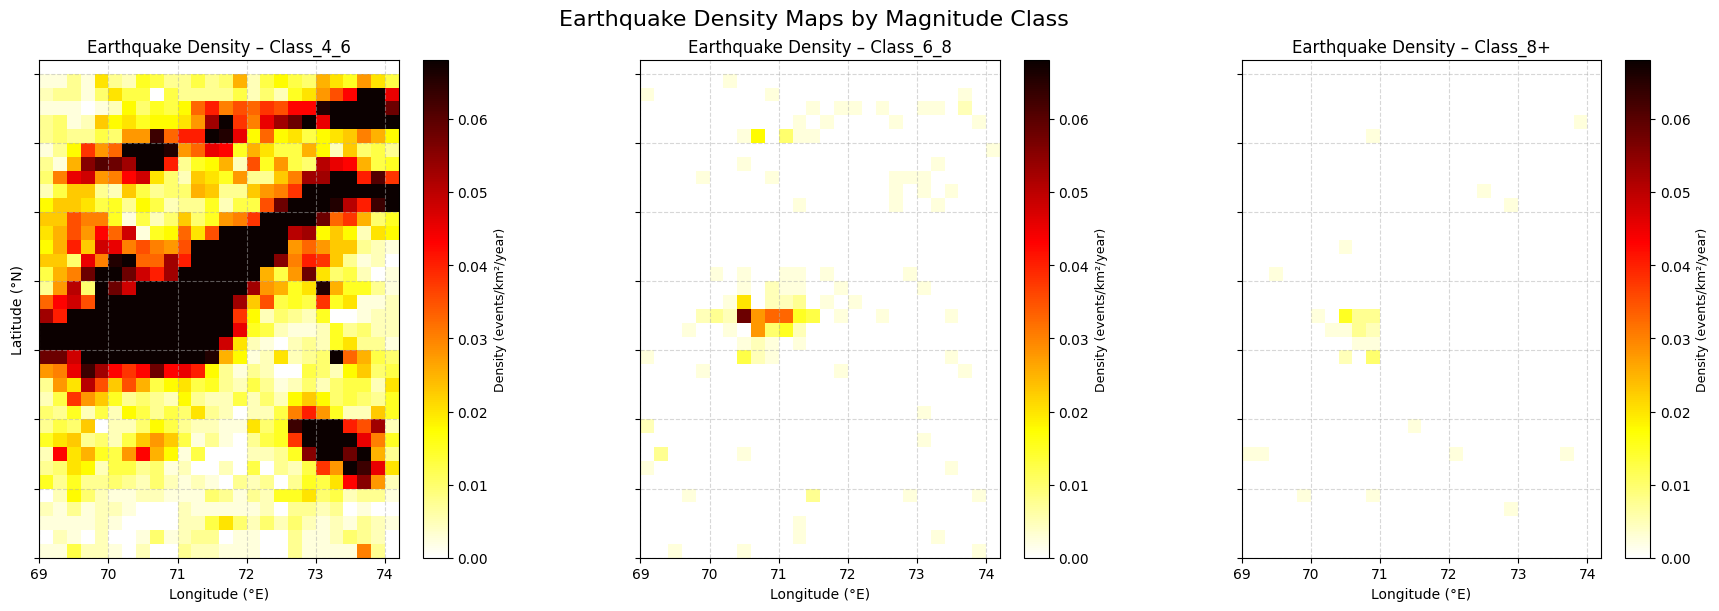

Density matrix with vector format saved to 'Seismic Precursor Calculation _.xlsx'.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')

# Define magnitude classes
magnitude_classes = {
    "Class_4_6": (4.0, 6.0),
    "Class_6_8": (6.0, 7.0),
    "Class_8+": (7.0, np.inf)
}

# Extract data
longitudes = data['Long.'].values
latitudes = data['Lat.'].values
magnitudes = data['Mw'].values  

# Define grid range (ensure it includes 40.2)
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74
lat_grid = np.arange(lat_min, lat_max + 0.2, 0.2)
lon_grid = np.arange(lon_min, lon_max + 0.2, 0.2)

# Grid cell area
grid_cell_area_km2 = 396.7  

# Create 3D density array
grid_density = np.zeros((len(lat_grid)-1, len(lon_grid)-1, len(magnitude_classes)))

# Fill density array
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        for k, (class_name, (mag_min, mag_max)) in enumerate(magnitude_classes.items()):
            in_grid = (
                (latitudes >= lat_grid[i]) & (latitudes < lat_grid[i+1]) &
                (longitudes >= lon_grid[j]) & (longitudes < lon_grid[j+1]) &
                (magnitudes >= mag_min) & (magnitudes < mag_max)
            )
            grid_density[i, j, k] = np.round(np.sum(in_grid) / grid_cell_area_km2, 4)

# Compute consistent color scale
vmin = np.nanpercentile(grid_density, 5)
vmax = np.nanpercentile(grid_density, 95)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True, sharex=True, sharey=True)

for k, (class_name, _) in enumerate(magnitude_classes.items()):
    ax = axes[k]
    pcm = ax.pcolormesh(lon_grid, lat_grid, grid_density[:, :, k],
                        cmap='hot_r', shading='auto',
                        vmin=vmin, vmax=vmax)
    ax.set_title(f'Earthquake Density – {class_name}', fontsize=12)
    ax.set_xlabel('Longitude (°E)', fontsize=10)
    ax.set_xticks(np.arange(lon_min, lon_max+1, 1))
    ax.set_yticks(np.arange(lat_min, lat_max+1, 1))
    ax.grid(linestyle='--', alpha=0.5)
    ax.set_aspect('equal')
    if k == 0:
        ax.set_ylabel('Latitude (°N)', fontsize=10)
    else:
        ax.set_yticklabels([])
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical')
    cbar.set_label('Density (events/km²/year)', fontsize=9)

plt.suptitle('Earthquake Density Maps by Magnitude Class', fontsize=16)
plt.show()

# ---- Saving Density Data to Excel ----
# Flatten the grid data into a DataFrame
density_tables = []
lat_centers = (lat_grid[:-1] + lat_grid[1:]) / 2
lon_centers = (lon_grid[:-1] + lon_grid[1:]) / 2

for k, (class_name, _) in enumerate(magnitude_classes.items()):
    rows = []
    for i, lat in enumerate(lat_centers):
        for j, lon in enumerate(lon_centers):
            density = grid_density[i, j, k]
            rows.append([lat, lon, density])
    df = pd.DataFrame(rows, columns=['Latitude', 'Longitude', 'Density'])
    density_tables.append((class_name, df))

# Save combined density (3 classes) as a single 2D table with vectors per cell
lat_labels = [f"{lat_grid[i]:.1f}-{lat_grid[i+1]:.1f}" for i in range(len(lat_grid)-1)]
lon_labels = [f"{lon_grid[j]:.1f}-{lon_grid[j+1]:.1f}" for j in range(len(lon_grid)-1)]

# Create DataFrame with string vectors for each cell
data_matrix = []
for i in range(len(lat_labels)):
    row = []
    for j in range(len(lon_labels)):
        vector = grid_density[i, j, :]
        row.append(f"{{{vector[0]:.4f}, {vector[1]:.4f}, {vector[2]:.4f}}}")
    data_matrix.append(row)

df_density_vector = pd.DataFrame(data_matrix, index=lat_labels, columns=lon_labels)

# Save only density vectors to Excel
output_file = 'Seismic Precursor Calculation _.xlsx'
df_density_vector.to_excel(output_file, sheet_name='Sheet1')
print(f"Density matrix with vector format saved to '{output_file}'.")


4 ≤ Mw < 6 → Number of events: 59065
Max latitude: 40.0
Events above 40° latitude: 0


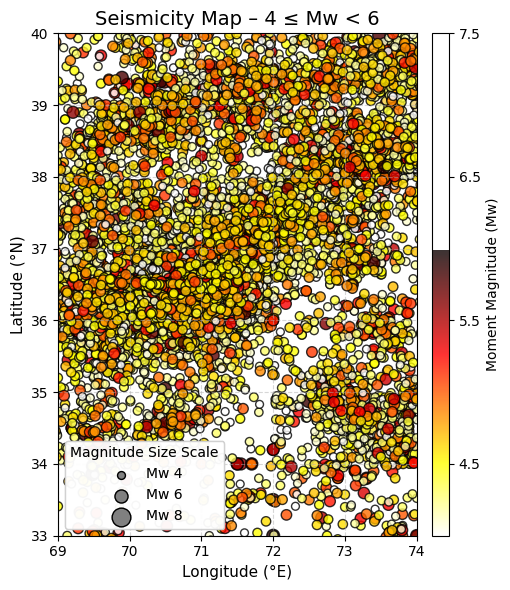

6 ≤ Mw < 7 → Number of events: 976
Max latitude: 39.994
Events above 40° latitude: 0


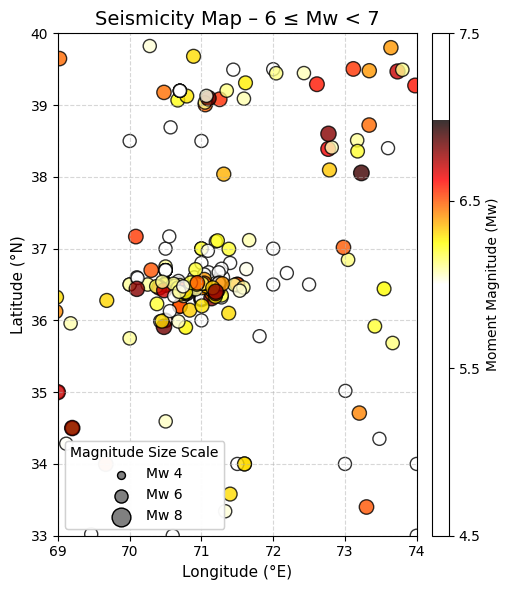

7 ≤ Mw → Number of events: 205
Max latitude: 39.762
Events above 40° latitude: 0


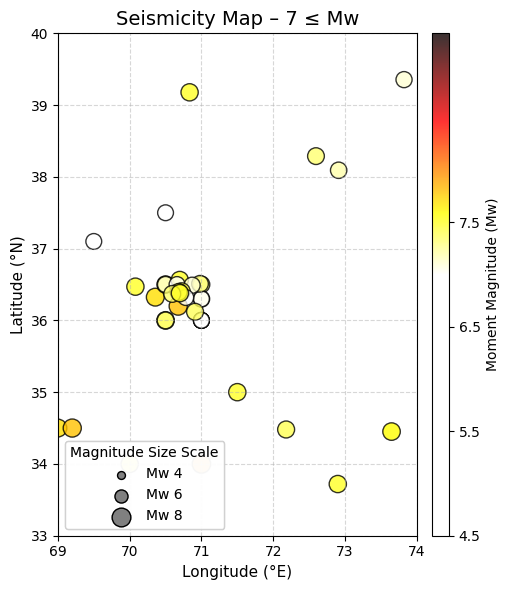

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')

# Define magnitude classes
magnitude_classes = {
    "4 ≤ Mw < 6": (4.0, 6.0),
    "6 ≤ Mw < 7": (6.0, 7.0),
    "7 ≤ Mw": (7.0, np.inf)
}

# Base map limits
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74

# Loop through each magnitude class to create a separate scatter plot
for title, (mag_min, mag_max) in magnitude_classes.items():
    # Filter data
    filtered_data = data[(data['Mw'] >= mag_min) & (data['Mw'] < mag_max)]
    
    # Scatter plot
    fig, ax = plt.subplots(figsize=(8, 6))
    magnitudes = filtered_data['Mw']
    
    # Create scatter plot
    scatter = ax.scatter(
        filtered_data['Long.'], filtered_data['Lat.'],
        c=magnitudes, cmap='hot_r', s=magnitudes**2.5, edgecolor='k', alpha=0.8
    )

    # Set axis limits and grid
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.set_xlabel('Longitude (°E)', fontsize=11)
    ax.set_ylabel('Latitude (°N)', fontsize=11)
    ax.set_title(f'Seismicity Map – {title}', fontsize=14)
    ax.grid(linestyle='--', alpha=0.5)
    ax.set_aspect('equal')

    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02, aspect=30)
    cbar.set_label('Moment Magnitude (Mw)')
    cbar.set_ticks([4.5, 5.5, 6.5, 7.5])
    cbar.set_ticklabels(['4.5', '5.5', '6.5', '7.5'])

    # Size legend
    size_legend = [(4, '4'), (6, '6'), (8, '8')]
    legend_elements = [
        plt.scatter([], [], c='grey', s=s**2.5, edgecolor='k', label=f'Mw {label}')
        for s, label in size_legend
    ]
    legend = ax.legend(handles=legend_elements, title='Magnitude Size Scale', loc='lower left', frameon=True)
    ax.add_artist(legend)

    # Debug info
    print(f"{title} → Number of events: {len(filtered_data)}")
    print("Max latitude:", filtered_data['Lat.'].max())
    print("Events above 40° latitude:", (filtered_data['Lat.'] > 40).sum())

    # Save and show
    plt.tight_layout()
    plt.savefig(f'Seismicity_Map_{title.replace(" ", "_").replace("≤", "le").replace("<", "lt")}.png', dpi=300)
    plt.show()


In [60]:
##### 7th precursor ## Time Since last Significant earthquake

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Function to calculate the haversine distance between two lat/lon points
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    r = 6371.0  # Radius of earth in kilometers
    return r * c

# Function to convert year, month, day to datetime
def convert_to_datetime(year, month, day):
    month = max(1, min(12, month)) if month != 0 else 1
    day = max(1, min(31, day)) if day != 0 else 1
    try:
        return datetime(year=year, month=month, day=day)
    except ValueError:
        return datetime(year=year, month=month, day=28)  # Fallback to last valid day

# Load and process data
#data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')
filtered_data = data[data['Mw'] >= 4.0].copy()

# Convert dates with error handling
filtered_data['DateTime'] = pd.to_datetime(
    filtered_data[['Year', 'Month', 'date']].rename(columns={'date': 'Day'}),
    errors='coerce'
)
filtered_data = filtered_data.dropna(subset=['DateTime'])

# Grid parameters
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74
lat_grid = np.arange(lat_min, lat_max + 0.2, 0.2)
lon_grid = np.arange(lon_min, lon_max + 0.2, 0.2)
time_since_last_eq_years = np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)

# Reference date
reference_date = datetime(2025, 1, 1)

# Calculate time since last earthquake
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        in_grid = (
            (filtered_data['Lat.'] >= lat_grid[i]) &
            (filtered_data['Lat.'] < lat_grid[i+1]) &
            (filtered_data['Long.'] >= lon_grid[j]) &
            (filtered_data['Long.'] < lon_grid[j+1])
        )
        if in_grid.any():
            most_recent = filtered_data.loc[in_grid, 'DateTime'].max()
            time_since_last_eq_years[i, j] = (reference_date - most_recent).days / 365.25

# File handling
excel_file = 'Seismic Precursor Calculation _.xlsx'
if not os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
        pd.DataFrame().to_excel(writer, sheet_name='Empty')

# Save data
with pd.ExcelWriter(excel_file, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    pd.DataFrame(time_since_last_eq_years,
                index=[f"{lat:.1f}-{lat+0.2:.1f}" for lat in lat_grid[:-1]],
                columns=[f"{lon:.1f}-{lon+0.2:.1f}" for lon in lon_grid[:-1]]
               ).to_excel(writer, sheet_name='Time Since Last EQ')



In [62]:
import numpy as np
import pandas as pd

# Load the earthquake data
#data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')

# Extract year column
years = data['Year'].astype(int).values
latitudes = data['Lat.'].values
longitudes = data['Long.'].values

# Define the latitude and longitude bounds for the grid
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74
lat_grid = np.arange(lat_min, lat_max + 0.2, 0.2)
lon_grid = np.arange(lon_min, lon_max + 0.2, 0.2)

# Create a 2D list to store years for each grid cell
grid_years = [[[] for _ in range(len(lon_grid) - 1)] for _ in range(len(lat_grid) - 1)]

# Assign earthquake years to the respective grid cells
for i in range(len(lat_grid) - 1):
    for j in range(len(lon_grid) - 1):
        grid_cell_data = data[
            (data['Lat.'] >= lat_grid[i]) & (data['Lat.'] < lat_grid[i + 1]) &
            (data['Long.'] >= lon_grid[j]) & (data['Long.'] < lon_grid[j + 1])
        ]
        grid_years[i][j] = list(grid_cell_data['Year'].astype(int)) if not grid_cell_data.empty else None

# Create a DataFrame to store the years of earthquakes
lat_labels = [f'{lat_grid[i]:.1f}-{lat_grid[i + 1]:.1f}' for i in range(len(lat_grid) - 1)]
lon_labels = [f'{lon_grid[j]:.1f}-{lon_grid[j + 1]:.1f}' for j in range(len(lon_grid) - 1)]
df_grid_years = pd.DataFrame(grid_years, index=lat_labels, columns=lon_labels)

# Save the result to the existing Excel file
with pd.ExcelWriter('Seismic Precursor Calculation _.xlsx', mode='a', engine='openpyxl') as writer:
    df_grid_years.to_excel(writer, sheet_name='Year Data')

print("Year data per grid cell saved in 'Seismic Precursor Calculation.xlsx'.")

Year data per grid cell saved in 'Seismic Precursor Calculation.xlsx'.


In [63]:
### 8th to 65th precursor

In [64]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import KDTree
from scipy.ndimage import gaussian_filter

# Load and filter data
# data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')
filtered_data = data[data['Mw'] >= 4.0]
longitudes = filtered_data['Long.'].values
latitudes = filtered_data['Lat.'].values
magnitudes = filtered_data['Mw'].values
years = filtered_data['Year'].values

# Grid setup
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74
lat_step, lon_step = 0.2, 0.2
lat_grid = np.arange(lat_min, lat_max + lat_step, lat_step)
lon_grid = np.arange(lon_min, lon_max + lon_step, lon_step)

# Grid centers for clustering
grid_centers = np.array([
    [(lat_grid[i] + lat_grid[i+1]) / 2, (lon_grid[j] + lon_grid[j+1]) / 2]
    for i in range(len(lat_grid)-1)
    for j in range(len(lon_grid)-1)
])
kmeans = KMeans(n_clusters=4, random_state=0).fit(grid_centers)
grid_regions = kmeans.labels_.reshape(len(lat_grid)-1, len(lon_grid)-1)

# Initialize parameter grids
param_grids = {
    'b_value_lsq': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'b_value_mlk': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'a_value_lsq': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'a_value_mlk': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'probabilities_m6_lsq': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'probabilities_m6_mlk': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'magnitude_deficit_lsq': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'magnitude_deficit_mlk': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'seismic_energy': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'mean_magnitude': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'max_magnitude': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'seismic_rate': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)
}
for M0 in np.arange(4.0, 6.1, 0.1):
    param_grids[f'recurrence_time_{M0:.1f}_lsq'] = np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)
    param_grids[f'recurrence_time_{M0:.1f}_mlk'] = np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)

# Get last year in catalog (T1)
T1 = filtered_data['Year'].max()

# Calculate b and a values per grid
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        in_cell = (
            (latitudes >= lat_grid[i]) & (latitudes < lat_grid[i+1]) &
            (longitudes >= lon_grid[j]) & (longitudes < lon_grid[j+1])
        )
        cell_data = filtered_data[in_cell]
        M = cell_data['Mw'].values

        if len(M) < 10:
            continue

        M_min = np.min(M)
        n = len(M)

        # Calculate b_lsq
        N = np.array([len(M[M >= m]) for m in M])
        valid = N > 0
        M_valid = M[valid]
        logN_valid = np.log10(N[valid])
        b_lsq = (n * np.sum(M_valid * logN_valid) - np.sum(M_valid) * np.sum(logN_valid)) / (
            n * np.sum(M_valid**2) - (np.sum(M_valid))**2 + 1e-10
        )

        # Calculate a_lsq per grid
        a_lsq = np.sum(logN_valid + b_lsq * M_valid) / n

        # Calculate b_mlk
        b_mlk = (np.log10(np.e)) / (np.mean(M) - M_min)

        # Calculate a_mlk per grid
        a_mlk = np.log10(n) + b_mlk * M_min

        # Assign to grid
        param_grids['b_value_lsq'][i, j] = b_lsq
        param_grids['b_value_mlk'][i, j] = b_mlk
        param_grids['a_value_lsq'][i, j] = a_lsq
        param_grids['a_value_mlk'][i, j] = a_mlk

# Fill missing b/a values with nearest neighbors
for param in ['b_value_lsq', 'b_value_mlk', 'a_value_lsq', 'a_value_mlk']:
    grid = param_grids[param]
    valid = ~np.isnan(grid)
    valid_coords = np.argwhere(valid)
    nan_coords = np.argwhere(~valid)
    if valid_coords.size > 0:
        tree = KDTree(valid_coords)
        _, nearest_indices = tree.query(nan_coords)
        grid[tuple(nan_coords.T)] = grid[tuple(valid_coords[nearest_indices].T)]

# Compute additional parameters
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        in_cell = (
            (latitudes >= lat_grid[i]) & (latitudes < lat_grid[i+1]) &
            (longitudes >= lon_grid[j]) & (longitudes < lon_grid[j+1])
        )
        cell_data = filtered_data[in_cell]
        M = cell_data['Mw'].values
        n = len(M)

        if n == 0:
            continue

        years_cell = cell_data['Year']
        Tn = years_cell.max()
        T = T1 - Tn + 1

        b_lsq = param_grids['b_value_lsq'][i, j]
        b_mlk = param_grids['b_value_mlk'][i, j]

        if not np.isnan(b_lsq):
            param_grids['probabilities_m6_lsq'][i, j] = 10 ** (-3 * b_lsq)
        if not np.isnan(b_mlk):
            param_grids['probabilities_m6_mlk'][i, j] = 10 ** (-3 * b_mlk)

        param_grids['mean_magnitude'][i, j] = np.mean(M)
        param_grids['max_magnitude'][i, j] = np.max(M)
        param_grids['seismic_energy'][i, j] = np.sum(10 ** (11.8 + 1.5 * M))
        param_grids['seismic_rate'][i, j] = n / T

        if not np.isnan(b_lsq):
            param_grids['magnitude_deficit_lsq'][i, j] = param_grids['max_magnitude'][i, j] - (np.log10(n) / b_lsq)
        if not np.isnan(b_mlk):
            param_grids['magnitude_deficit_mlk'][i, j] = param_grids['max_magnitude'][i, j] - (np.log10(n) / b_mlk)

        for M0 in np.arange(4.0, 6.1, 0.1):
            if not np.isnan(b_lsq):
                param_grids[f'recurrence_time_{M0:.1f}_lsq'][i, j] = T / 10 ** (np.log10(n) - b_lsq * M0)
            if not np.isnan(b_mlk):
                param_grids[f'recurrence_time_{M0:.1f}_mlk'][i, j] = T / 10 ** (np.log10(n) - b_mlk * M0)

# Apply Gaussian smoothing to selected parameters
smooth_params = ['max_magnitude', 'mean_magnitude', 'seismic_energy', 'seismic_rate']
for param in smooth_params:
    grid = param_grids[param]
    grid[np.isnan(grid)] = 0
    param_grids[param] = gaussian_filter(grid, sigma=1, mode='nearest')

# Selective smoothing for NaN/zero regions
excluded_params = ['b_value_lsq', 'b_value_mlk', 'a_value_lsq', 'a_value_mlk'] + smooth_params
for param, grid in param_grids.items():
    if param in excluded_params:
        continue
    grid_copy = grid.copy()
    mask_bad = (np.isnan(grid_copy)) | (grid_copy == 0)
    mask_good = ~mask_bad
    smoothed_grid = gaussian_filter(np.nan_to_num(grid_copy), sigma=1, mode='nearest')
    grid_copy[mask_bad] = smoothed_grid[mask_bad]
    param_grids[param] = grid_copy

# Save to Excel
lat_labels = [f'{lat_grid[i]:.1f}-{lat_grid[i+1]:.1f}' for i in range(len(lat_grid)-1)]
lon_labels = [f'{lon_grid[j]:.1f}-{lon_grid[j+1]:.1f}' for j in range(len(lon_grid)-1)]

with pd.ExcelWriter("Seismic Precursor Calculation_new_.xlsx") as writer:
    for param, grid in param_grids.items():
        df = pd.DataFrame(grid, index=lat_labels, columns=lon_labels)
        df.to_excel(writer, sheet_name=param)

print("All parameter grids saved to 'Seismic Precursor Calculation_new_.xlsx'.")


All parameter grids saved to 'Seismic Precursor Calculation_new_.xlsx'.


In [65]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import KDTree
from scipy.ndimage import gaussian_filter

# Load data
#data = pd.read_excel('Updated_catalog_2023.xlsx', sheet_name='Sheet1')
filtered_data = data[data['Mw'] >= 4.0]
longitudes = filtered_data['Long.'].values
latitudes = filtered_data['Lat.'].values
magnitudes = filtered_data['Mw'].values
years = filtered_data['Year'].values

# Grid setup
lat_min, lat_max = 33, 40
lon_min, lon_max = 69, 74
lat_step, lon_step = 0.2, 0.2
lat_grid = np.arange(lat_min, lat_max + lat_step, lat_step)
lon_grid = np.arange(lon_min, lon_max + lon_step, lon_step)

# Grid centers for clustering
grid_centers = np.array([
    [(lat_grid[i] + lat_grid[i+1]) / 2, (lon_grid[j] + lon_grid[j+1]) / 2]
    for i in range(len(lat_grid)-1)
    for j in range(len(lon_grid)-1)
])
kmeans = KMeans(n_clusters=4, random_state=0).fit(grid_centers)
grid_regions = kmeans.labels_.reshape(len(lat_grid)-1, len(lon_grid)-1)

# Initialize parameter grids
param_grids = {
    'b_value_lsq': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'b_value_mlk': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'probabilities_m6_lsq': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'probabilities_m6_mlk': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'magnitude_deficit_lsq': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'magnitude_deficit_mlk': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'seismic_energy': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'mean_magnitude': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'max_magnitude': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan),
    'seismic_rate': np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)
}
for M0 in np.arange(4.0, 6.1, 0.1):
    param_grids[f'recurrence_time_{M0:.1f}_lsq'] = np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)
    param_grids[f'recurrence_time_{M0:.1f}_mlk'] = np.full((len(lat_grid)-1, len(lon_grid)-1), np.nan)

# Compute b-values per region
region_b_values = {'lsq': {}, 'mlk': {}}
for region_id in range(4):
    region_mask = grid_regions == region_id
    region_cells = np.argwhere(region_mask)
    region_quakes = []

    for i, j in region_cells:
        in_cell = (
            (latitudes >= lat_grid[i]) & (latitudes < lat_grid[i+1]) &
            (longitudes >= lon_grid[j]) & (longitudes < lon_grid[j+1])
        )
        region_quakes.extend(filtered_data[in_cell]['Mw'].values)

    if len(region_quakes) < 10:
        continue

    M = np.array(region_quakes)
    M_min = np.min(M)
    n = len(M)

    N = np.array([len(M[M >= m]) for m in M])
    valid = N > 0
    M_valid = M[valid]
    logN_valid = np.log10(N[valid])
    b_lsq = (n * np.sum(M_valid * logN_valid) - np.sum(M_valid) * np.sum(logN_valid)) / (
        n * np.sum(M_valid**2) - (np.sum(M_valid))**2 + 1e-10
    )
    b_mlk = (np.log10(np.e)) / (np.mean(M) - M_min)

    region_b_values['lsq'][region_id] = b_lsq
    region_b_values['mlk'][region_id] = b_mlk

# Assign b-values to grid
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        region_id = grid_regions[i, j]
        param_grids['b_value_lsq'][i, j] = region_b_values['lsq'].get(region_id, np.nan)
        param_grids['b_value_mlk'][i, j] = region_b_values['mlk'].get(region_id, np.nan)

# Fill missing b-values with nearest neighbors
for param in ['b_value_lsq', 'b_value_mlk']:
    grid = param_grids[param]
    valid = ~np.isnan(grid)
    valid_coords = np.argwhere(valid)
    nan_coords = np.argwhere(~valid)
    if valid_coords.size > 0:
        tree = KDTree(valid_coords)
        _, nearest_indices = tree.query(nan_coords)
        grid[tuple(nan_coords.T)] = grid[tuple(valid_coords[nearest_indices].T)]

# Calculate grid-based parameters
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        in_cell = (
            (latitudes >= lat_grid[i]) & (latitudes < lat_grid[i+1]) &
            (longitudes >= lon_grid[j]) & (longitudes < lon_grid[j+1])
        )
        cell_data = filtered_data[in_cell]
        M = cell_data['Mw'].values
        n = len(M)

        if n == 0:
            continue

        years_cell = cell_data['Year']
        year_range = years_cell.max() - years_cell.min() + 1e-10

        b_lsq = param_grids['b_value_lsq'][i, j]
        b_mlk = param_grids['b_value_mlk'][i, j]

        if not np.isnan(b_lsq):
            param_grids['probabilities_m6_lsq'][i, j] = 10 ** (-3 * b_lsq)
        if not np.isnan(b_mlk):
            param_grids['probabilities_m6_mlk'][i, j] = 10 ** (-3 * b_mlk)

        param_grids['mean_magnitude'][i, j] = np.mean(M)
        param_grids['max_magnitude'][i, j] = np.max(M)
        param_grids['seismic_energy'][i, j] = np.sum(10 ** (11.8 + 1.5 * M))
        param_grids['seismic_rate'][i, j] = n / year_range

        if not np.isnan(b_lsq):
            param_grids['magnitude_deficit_lsq'][i, j] = param_grids['max_magnitude'][i, j] - (np.log10(n) / b_lsq)
        if not np.isnan(b_mlk):
            param_grids['magnitude_deficit_mlk'][i, j] = param_grids['max_magnitude'][i, j] - (np.log10(n) / b_mlk)

        for M0 in np.arange(4.0, 6.1, 0.1):
            if not np.isnan(b_lsq):
                param_grids[f'recurrence_time_{M0:.1f}_lsq'][i, j] = year_range / 10 ** (np.log10(n) - b_lsq * M0)
            if not np.isnan(b_mlk):
                param_grids[f'recurrence_time_{M0:.1f}_mlk'][i, j] = year_range / 10 ** (np.log10(n) - b_mlk * M0)

# Apply Gaussian smoothing only to selected parameters (fully)
smooth_params = ['max_magnitude', 'mean_magnitude', 'seismic_energy', 'seismic_rate']
for param in smooth_params:
    grid = param_grids[param]
    grid[np.isnan(grid)] = 0  # Replace NaN with 0 before smoothing
    param_grids[param] = gaussian_filter(grid, sigma=1, mode='nearest')

# Selective smoothing for zero/NaN regions in other parameters
excluded_params = ['b_value_lsq', 'b_value_mlk'] + smooth_params
for param, grid in param_grids.items():
    if param in excluded_params:
        continue

    grid_copy = grid.copy()
    mask_bad = (np.isnan(grid_copy)) | (grid_copy == 0)
    mask_good = ~mask_bad

    # Apply Gaussian filter to entire grid with NaNs replaced by 0
    smoothed_grid = gaussian_filter(np.nan_to_num(grid_copy), sigma=1, mode='nearest')

    # Fill only the missing/zero cells
    grid_copy[mask_bad] = smoothed_grid[mask_bad]
    param_grids[param] = grid_copy

# Save to Excel
lat_labels = [f'{lat_grid[i]:.1f}-{lat_grid[i+1]:.1f}' for i in range(len(lat_grid)-1)]
lon_labels = [f'{lon_grid[j]:.1f}-{lon_grid[j+1]:.1f}' for j in range(len(lon_grid)-1)]

with pd.ExcelWriter("Seismic Precursor Calculation_new_.xlsx") as writer:
    for param, grid in param_grids.items():
        df = pd.DataFrame(grid, index=lat_labels, columns=lon_labels)
        df.to_excel(writer, sheet_name=param)

print("All parameter grids saved to 'Seismic Precursor Calculation_new_.xlsx'.")


All parameter grids saved to 'Seismic Precursor Calculation_new_.xlsx'.


In [66]:
#### additional code where i have saved a values

In [67]:
# Calculate recurrence time with fixed values for specific magnitudes
for i in range(len(lat_grid)-1):
    for j in range(len(lon_grid)-1):
        in_cell = (
            (latitudes >= lat_grid[i]) & (latitudes < lat_grid[i+1]) &
            (longitudes >= lon_grid[j]) & (longitudes < lon_grid[j+1])
        )
        cell_data = filtered_data[in_cell]
        M = cell_data['Mw'].values
        n = len(M)

        if n == 0:
            continue

        years_cell = cell_data['Year']
        year_range = years_cell.max() - years_cell.min() + 1e-10

        b_lsq = param_grids['b_value_lsq'][i, j]
        b_mlk = param_grids['b_value_mlk'][i, j]

        if not np.isnan(b_lsq):
            param_grids['probabilities_m6_lsq'][i, j] = 10 ** (-3 * b_lsq)
        if not np.isnan(b_mlk):
            param_grids['probabilities_m6_mlk'][i, j] = 10 ** (-3 * b_mlk)

        param_grids['mean_magnitude'][i, j] = np.mean(M)
        param_grids['max_magnitude'][i, j] = np.max(M)
        param_grids['seismic_energy'][i, j] = np.sum(10 ** (11.8 + 1.5 * M))
        param_grids['seismic_rate'][i, j] = n / year_range

        if not np.isnan(b_lsq):
            param_grids['magnitude_deficit_lsq'][i, j] = param_grids['max_magnitude'][i, j] - (np.log10(n) / b_lsq)
        if not np.isnan(b_mlk):
            param_grids['magnitude_deficit_mlk'][i, j] = param_grids['max_magnitude'][i, j] - (np.log10(n) / b_mlk)

        # Use fixed recurrence times based on magnitude range
        for M0 in np.arange(4.0, 6.1, 0.1):
            if 4.0 <= M0 < 5.0:
                # For magnitude range 4.0-5.0, use T = 516
                param_grids[f'recurrence_time_{M0:.1f}_lsq'][i, j] = year_range / 516
                param_grids[f'recurrence_time_{M0:.1f}_mlk'][i, j] = year_range / 516
            elif 5.0 <= M0 < 6.0:
                # For magnitude range 5.0-6.0, use T = 98
                param_grids[f'recurrence_time_{M0:.1f}_lsq'][i, j] = year_range / 98
                param_grids[f'recurrence_time_{M0:.1f}_mlk'][i, j] = year_range / 98
            else:
                # For other magnitudes, compute using the formula (or skip if you don't need to calculate them)
                if not np.isnan(b_lsq):
                    param_grids[f'recurrence_time_{M0:.1f}_lsq'][i, j] = year_range / 10 ** (np.log10(n) - b_lsq * M0)
                if not np.isnan(b_mlk):
                    param_grids[f'recurrence_time_{M0:.1f}_mlk'][i, j] = year_range / 10 ** (np.log10(n) - b_mlk * M0)


In [68]:
from scipy.ndimage import gaussian_filter

# Function to apply Gaussian filter with NaN handling
def smooth_with_nan(data, sigma=1):
    data_copy = data.copy()
    nan_mask = np.isnan(data_copy)
    data_copy[nan_mask] = 0
    weights = (~nan_mask).astype(float)

    smoothed_data = gaussian_filter(data_copy * weights, sigma=sigma)
    smoothed_weights = gaussian_filter(weights, sigma=sigma)

    with np.errstate(invalid='ignore'):
        result = smoothed_data / smoothed_weights
        result[smoothed_weights == 0] = np.nan

    return result

# Apply smoothing to the desired grids
SIGMA = 2.0  # You can adjust this for more/less smoothing

smoothed_grids = {
    'a_value_lsq': smooth_with_nan(param_grids['a_value_lsq'], sigma=SIGMA),
    'a_value_mlk': smooth_with_nan(param_grids['a_value_mlk'], sigma=SIGMA),
    'std_dev_b_lsq': smooth_with_nan(param_grids['std_dev_b_lsq'], sigma=SIGMA),
    'std_dev_b_mlk': smooth_with_nan(param_grids['std_dev_b_mlk'], sigma=SIGMA),
    'deviation_lsq': smooth_with_nan(param_grids['deviation_lsq'], sigma=SIGMA),
    'deviation_mlk': smooth_with_nan(param_grids['deviation_mlk'], sigma=SIGMA)
}


KeyError: 'a_value_lsq'

In [ ]:
#### sesimic plot for 42 precursors

In [ ]:
import matplotlib.pyplot as plt
import os
import zipfile
import re

# Define styling for each parameter type
param_styles = {
    'b_value': {
        'cmap': 'viridis',
        'title_template': 'B-Value ({method})',
        'label': 'b-value'
    },
    'probabilities': {
        'cmap': 'Reds',
        'title_template': 'Probability of M≥6 ({method})',
        'label': 'Probability'
    },
    'magnitude_deficit': {
        'cmap': 'coolwarm',
        'title_template': 'Magnitude Deficit ({method})',
        'label': 'Magnitude Deficit'
    },
    'seismic_energy': {
        'cmap': 'plasma',
        'title_template': 'Seismic Energy',
        'label': 'Seismic Energy (J)'
    },
    'mean_magnitude': {
        'cmap': 'inferno',
        'title_template': 'Mean Magnitude',
        'label': 'Magnitude'
    },
    'max_magnitude': {
        'cmap': 'magma',
        'title_template': 'Maximum Magnitude',
        'label': 'Magnitude'
    },
    'seismic_rate': {
        'cmap': 'YlOrBr',
        'title_template': 'Seismic Rate',
        'label': 'Events/Year'
    },
    'recurrence_time': {
        'cmap': 'YlGnBu',
        'title_template': 'Recurrence Time for M={M0} ({method})',
        'label': 'Years'
    }
}

png_files = []

for param in param_grids:
    base = None
    method = None
    M0 = None

    if param.startswith('b_value_'):
        base = 'b_value'
        method = param.split('_')[-1]
    elif param.startswith('probabilities_m6_'):
        base = 'probabilities'
        method = param.split('_')[-1]
    elif param.startswith('magnitude_deficit_'):
        base = 'magnitude_deficit'
        method = param.split('_')[-1]
    elif param.startswith('recurrence_time_'):
        match = re.match(r'recurrence_time_([0-9.]+)_(lsq|mlk)', param)
        if match:
            M0 = match.group(1)
            method = match.group(2)
            base = 'recurrence_time'
    else:
        base = param

    if base not in param_styles:
        continue

    style = param_styles[base]
    cmap = style['cmap']
    title_template = style['title_template']
    label = style['label']

    if base == 'recurrence_time' and M0 and method:
        title = title_template.format(M0=M0, method=method.upper())
    elif method:
        title = title_template.format(method=method.upper())
    else:
        title = title_template

    grid = np.nan_to_num(param_grids[param])

    plt.figure(figsize=(8, 6))
    plt.imshow(grid, extent=[lon_min, lon_max, lat_min, lat_max], origin='lower', cmap=cmap)
    plt.colorbar(label=label)
    plt.xlabel('Longitude (° E)', fontsize=12)
    plt.ylabel('Latitude (° N)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(ticks=np.arange(lon_min, lon_max + 1, 1), labels=[f'{int(lon)}° E' for lon in np.arange(lon_min, lon_max + 1, 1)], fontsize=10)
    plt.yticks(ticks=np.arange(lat_min, lat_max + 1, 1), labels=[f'{int(lat)}° N' for lat in np.arange(lat_min, lat_max + 1, 1)], fontsize=10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()

    filename = f"{param}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    png_files.append(filename)

# Create zip file and clean up PNGs
zip_path = os.path.join(os.getcwd(), "Seismic_Parameter_Plots.zip")
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for file in png_files:
        zipf.write(file, os.path.basename(file))
        os.remove(file)

print(f"Heatmaps saved to {zip_path}")

In [ ]:
### seismic plot for a values

In [ ]:
# Reuse the updated heatmap plotting function
def plot_heatmap(data, title, filename, cmap='viridis_r', vmin=None, vmax=None, colorbar_label=''):
    #plt.figure(figsize=(12, 8))
    plt.pcolormesh(lon_grid, lat_grid, data, cmap=cmap, shading='auto', vmin=vmin, vmax=vmax)
    plt.colorbar(label=colorbar_label)
    plt.title(title)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Latitude (°N)')
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    plt.xticks(np.arange(lon_min, lon_max + 1, 1))
    plt.yticks(np.arange(lat_min, lat_max + 1, 1))
    plt.grid(linestyle='--', alpha=0.3)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()

# Define the title and filename map
titles_and_labels = {
    'a_value_lsq': ('Smoothed a-value (Least Squares)', 'smoothed_a_value_lsq.png', 'a-value (LSQ)'),
    'a_value_mlk': ('Smoothed a-value (Maximum Likelihood)', 'smoothed_a_value_mlk.png', 'a-value (MLK)'),
    'std_dev_b_lsq': ('Smoothed Std. Dev. of b (Least Squares)', 'smoothed_std_dev_b_lsq.png', 'Std. Dev. of b (LSQ)'),
    'std_dev_b_mlk': ('Smoothed Std. Dev. of b (Maximum Likelihood)', 'smoothed_std_dev_b_mlk.png', 'Std. Dev. of b (MLK)'),
    'deviation_lsq': ('Smoothed Deviation (Least Squares)', 'smoothed_deviation_lsq.png', 'Deviation (LSQ)'),
    'deviation_mlk': ('Smoothed Deviation (Maximum Likelihood)', 'smoothed_deviation_mlk.png', 'Deviation (MLK)')
}

# Loop and plot each heatmap
for key, data in smoothed_grids.items():
    title, filename, label = titles_and_labels[key]
    plot_heatmap(data, title=title, filename=filename, colorbar_label=label)

print("✅ All smoothed heatmaps plotted and saved.")


In [ ]:
import pandas as pd

# Load both Excel files
file1 = "Seismic Precursor Calculation _.xlsx"
file2 = "Seismic Precursor Calculation_new_.xlsx"
output_file = "Seismic_Precursor_Calculation_Combined.xlsx"

# Read all sheets from both files
sheets1 = pd.read_excel(file1, sheet_name=None)
sheets2 = pd.read_excel(file2, sheet_name=None)

# Merge sheets into a new Excel file
with pd.ExcelWriter(output_file) as writer:
    for sheet_name, df in sheets1.items():
        df.to_excel(writer, sheet_name=f"{sheet_name}_old", index=False)
    for sheet_name, df in sheets2.items():
        df.to_excel(writer, sheet_name=f"{sheet_name}_new", index=False)

print(f"Combined Excel file saved as '{output_file}'.")


In [ ]:
import pandas as pd

# Load the Excel file
file_path = "Seismic_Precursor_Calculation_Combined.xlsx"
xls = pd.ExcelFile(file_path)

# Read the first sheet to extract reference latitude and longitude
ref_sheet = xls.sheet_names[0]
df_ref = pd.read_excel(xls, sheet_name=ref_sheet)

# Debugging: Check the first few rows of the reference sheet
print("Reference Sheet Sample:\n", df_ref.head())

# Extract the lower bound of latitude ranges
latitudes = df_ref.iloc[:34, 0].astype(str).str.extract(r'(\d+\.\d+)')[0].astype(float).dropna().values

# Extract the lower bound of longitude ranges from column headers
longitudes = pd.Series(df_ref.columns[1:]).astype(str).str.extract(r'(\d+\.\d+)')[0].astype(float).dropna().values

# Debugging: Print extracted latitudes and longitudes
print("Extracted Latitudes:", latitudes)
print("Extracted Longitudes:", longitudes)

# **Ensure latitude and longitude are repeated properly**
if len(latitudes) == 0 or len(longitudes) == 0:
    raise ValueError("Latitude or Longitude extraction failed. Check the input data.")

lat_grid, lon_grid = zip(*[(lat, lon) for lat in latitudes for lon in longitudes])
combined_df = pd.DataFrame({"Latitude": lat_grid, "Longitude": lon_grid})

# Iterate through all sheets in the file
for sheet in xls.sheet_names:
    print(f"Processing sheet: {sheet}")  # Debugging: See which sheet is being processed
    
    # Read the sheet data
    df = pd.read_excel(xls, sheet_name=sheet)
    df = df.iloc[:34, :]  # Keep only the first 34 rows
    
    # Extract values and flatten
    values = df.iloc[:, 1:].fillna(0).values.flatten()
    
    # Create DataFrame for the current sheet
    temp_df = pd.DataFrame({sheet: values})
    
    # Concatenate with the main DataFrame
    combined_df = pd.concat([combined_df, temp_df], axis=1)

# Debugging: Check the final DataFrame before saving
print("Final combined DataFrame sample:\n", combined_df.head())

# Save to a new Excel file
output_file = "Flattened_Seismic_Data.xlsx"
combined_df.to_excel(output_file, index=False)

print(f"Flattened data has been saved to {output_file}.")


In [ ]:
############## the ouput file

In [ ]:
import pandas as pd

# Load the Excel file
file_path = "Seismic_Precursor_Calculation_Combined.xlsx"
xls = pd.ExcelFile(file_path)

# Read the first sheet to extract reference ranges
ref_sheet = xls.sheet_names[0]
df_ref = pd.read_excel(xls, sheet_name=ref_sheet)

# Extract latitude ranges from first column
latitude_ranges = df_ref.iloc[:34, 0].astype(str).str.strip().values

# Extract longitude ranges from column headers (skip first column)
longitude_ranges = df_ref.columns[1:].astype(str).str.strip().values

# Create grid combinations with full range strings
grid_combinations = [(lat, lon) for lat in latitude_ranges for lon in longitude_ranges]
combined_df = pd.DataFrame(grid_combinations, columns=["Latitude Range", "Longitude Range"])

# Process all sheets
for sheet in xls.sheet_names:
    print(f"Processing sheet: {sheet}")
    
    # Read and clean sheet data
    df = pd.read_excel(xls, sheet_name=sheet).iloc[:34, 1:]  # Skip latitude range column
    df = df.fillna(0)
    
    # Flatten values in row-major order
    sheet_values = df.values.flatten(order='C')
    
    # Add to combined DataFrame
    combined_df[sheet] = sheet_values

# Save to new Excel file
output_file = "Flattened_Seismic_Data_With_Ranges.xlsx"
combined_df.to_excel(output_file, index=False)

print(f"Flattened data with ranges saved to {output_file}")